In [ ]:
pip install git+https://github.com/urbanogilson/SICAR

sudo apt install tesseract-ocr -y

In [96]:
#Importar biblioteca SICAR
from SICAR import Sicar, State, Polygon
import geopandas as gpd
import zipfile  # Para manipular arquivos ZIP (compactação e extração)


In [58]:
# Verificar data de atualização e os estados 

# Create Sicar instance
car = Sicar()

# Get release data dates
state_dates = car.get_release_dates()

# Verificar datas de atualização
print('#'*100)
print(state_dates)
print('#'*100)
# Verficar os estados disponíveis
help(State)
print('#'*100)


####################################################################################################
{<State.AC: 'AC'>: '03/04/2025', <State.AL: 'AL'>: '04/04/2025', <State.AP: 'AP'>: '02/04/2025', <State.AM: 'AM'>: '03/04/2025', <State.BA: 'BA'>: '02/04/2025', <State.CE: 'CE'>: '02/04/2025', <State.DF: 'DF'>: '03/04/2025', <State.ES: 'ES'>: '01/04/2025', <State.GO: 'GO'>: '04/04/2025', <State.MA: 'MA'>: '03/04/2025', <State.MT: 'MT'>: '02/04/2025', <State.MS: 'MS'>: '01/04/2025', <State.MG: 'MG'>: '05/04/2025', <State.PA: 'PA'>: '03/04/2025', <State.PB: 'PB'>: '01/04/2025', <State.PR: 'PR'>: '02/04/2025', <State.PE: 'PE'>: '01/04/2025', <State.PI: 'PI'>: '01/04/2025', <State.RJ: 'RJ'>: '01/04/2025', <State.RN: 'RN'>: '01/04/2025', <State.RS: 'RS'>: '04/04/2025', <State.RO: 'RO'>: '03/04/2025', <State.RR: 'RR'>: '03/04/2025', <State.SC: 'SC'>: '03/04/2025', <State.SP: 'SP'>: '04/04/2025', <State.SE: 'SE'>: '04/04/2025', <State.TO: 'TO'>: '02/04/2025'}
##################################

In [78]:
#@title Download da Área do imóvel e da Reserva Legal
# Create Sicar instance
car = Sicar()
# Download APPS polygon for the SC state
car.download_state(State.SC, Polygon.AREA_PROPERTY, folder='./geodados/SC/')

PosixPath('geodados/SC/SC_AREA_IMOVEL.zip')

In [60]:
# Extrair shapefile
pasta_geodados = './geodados/SC/'
arquivo_zip = 'SC_AREA_IMOVEL.zip'

# Abrindo o arquivo ZIP em modo de leitura
with zipfile.ZipFile(pasta_geodados+arquivo_zip, 'r') as zip_ref:

    # Extraindo todo o conteúdo do arquivo ZIP para o diretório de extração
    zip_ref.extractall(pasta_geodados)

In [97]:
# Leitura do shapefile da área do imóvel
# Nome do shapefile
nome_shape = 'AREA_IMOVEL_1.shp'
# Ler shapefile com geopandas (GeoDataFrame)
area_imovel = gpd.read_file(pasta_geodados+nome_shape)

In [15]:
area_imovel

,cod_tema,nom_tema,cod_imovel,mod_fiscal,num_area,ind_status,ind_tipo,des_condic,municipio,cod_estado,dat_criaca,dat_atuali,geometry
0,AREA_IMOVEL,Area do Imovel,SC-4207502-E675C23ECEB149F091AD009E3B23DC01,0.0176,0.2116,CA,IRU,Cancelado por decisao administrativa,Indaial,SC,09/05/2014,09/05/2014,"POLYGON ((-49.22587 -26.89228, -49.22559 -26.8..."
1,AREA_IMOVEL,Area do Imovel,SC-4210803-DBAE1CCF8EF9479E92CA31B04C5843F1,0.1667,3.0010,AT,IRU,"Analisado, aguardando atendimento a notificacao",Meleiro,SC,09/05/2014,09/05/2014,"POLYGON ((-49.6647 -28.79335, -49.66473 -28.79..."
2,AREA_IMOVEL,Area do Imovel,SC-4214904-7AB5F604B349434681D390BCCB694665,4.7627,66.6788,AT,IRU,Aguardando analise,Rio Fortuna,SC,12/05/2014,12/05/2014,"POLYGON ((-49.19622 -28.15752, -49.19618 -28.1..."
3,AREA_IMOVEL,Area do Imovel,SC-4201653-30F17884042E432CB2863B130CA01F76,0.6330,12.6608,AT,IRU,Aguardando analise,Arvoredo,SC,19/05/2014,19/05/2014,"POLYGON ((-52.42572 -27.03299, -52.42594 -27.0..."
4,AREA_IMOVEL,Area do Imovel,SC-4216602-38EE532D4CFD4EB89192FF0C6BFBE1C7,0.8374,10.0485,AT,IRU,Em analise,Sao Jose,SC,11/05/2014,11/05/2014,"POLYGON ((-48.66491 -27.57973, -48.66269 -27.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
407901,AREA_IMOVEL,Area do Imovel,SC-4202503-09AE248330334ACABFC89D5DC8E039FF,3.8056,76.1112,AT,IRU,Aguardando analise,Bom Jardim da Serra,SC,27/09/2024,27/09/2024,"POLYGON ((-49.64308 -28.39363, -49.64264 -28.3..."
407902,AREA_IMOVEL,Area do Imovel,SC-4208401-9EA3CDAF128F452FB9A5EF1A5016EC31,0.2186,4.3719,AT,IRU,Aguardando analise,Itapiranga,SC,17/01/2024,27/09/2024,"POLYGON ((-53.66599 -27.1589, -53.66601 -27.15..."
407903,AREA_IMOVEL,Area do Imovel,SC-4205209-7FBD0477894E41FFB6BF4A4AC7482700,0.7063,14.1268,AT,IRU,Aguardando analise,Erval Velho,SC,27/09/2024,27/09/2024,"POLYGON ((-51.41255 -27.31155, -51.41339 -27.3..."
407904,AREA_IMOVEL,Area do Imovel,SC-4203303-BB2479E8AA824103BFFA6BA368A6EE7B,1.5764,25.2223,AT,IRU,Aguardando analise,Campo Alegre,SC,04/05/2016,27/09/2024,"POLYGON ((-49.2403 -26.09465, -49.24006 -26.09..."


In [98]:
# Selecionar o município de Campos Novos - SC
municipios = ['Santa Terezinha', 'Vitor Meireles']
# Filtrar o GeoDataFrame para o município desejado
area_imovel_mun = area_imovel[area_imovel['municipio'].isin( municipios)]
# Exibir o GeoDataFrame filtrado
print(area_imovel_mun)

           cod_tema        nom_tema  \
134     AREA_IMOVEL  Area do Imovel   
362     AREA_IMOVEL  Area do Imovel   
433     AREA_IMOVEL  Area do Imovel   
703     AREA_IMOVEL  Area do Imovel   
837     AREA_IMOVEL  Area do Imovel   
...             ...             ...   
407119  AREA_IMOVEL  Area do Imovel   
407153  AREA_IMOVEL  Area do Imovel   
407405  AREA_IMOVEL  Area do Imovel   
407678  AREA_IMOVEL  Area do Imovel   
407800  AREA_IMOVEL  Area do Imovel   

                                         cod_imovel  mod_fiscal  num_area  \
134     SC-4215679-EE3EB85557354912BC8F21F3126B76C6      1.0809   17.2937   
362     SC-4215679-05AD44B87BAD42D5BA857EC205833914      0.7607   12.1709   
433     SC-4215679-8D2CF49E43B641E3AD82A498A3CCBF9A      0.6565   10.5045   
703     SC-4215679-23D90A3D2AAE4BC8ABFAD462B49D44F3      1.5379   24.6060   
837     SC-4215679-D30BCCF2EA6F496897F2476C2C5D70C2      1.4910   24.2916   
...                                             ...         ...      

<Axes: >

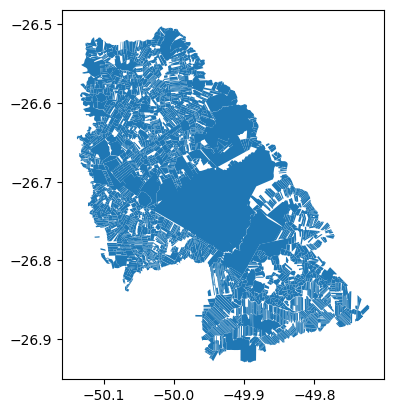

In [ ]:
area_imovel_mun.plot()

In [99]:
#Inserir GeoDataFrame no Geopackage

# Caminho para o arquivo geopackage
caminho_gpkg = './car_embargos.gpkg'

# Criar a GeoPackage from the GeoDataFrame
area_imovel_mun.to_file(caminho_gpkg, driver='GPKG', layer = 'area_imovel')

In [100]:
# Download embargos do ICMBio e do IBAMA
# Definir o estado desejado
uf = 'SC'  # Santa Catarina
# URL do serviço WFS do ICMBio e do IBAMA
url_embargos_icmbio = f"https://geoservicos.inde.gov.br/geoserver/ICMBio/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=ICMBio%3Aembargos_icmbio&maxFeatures=10000000&outputFormat=application%2Fjson&cql_filter=uf='{uf}'"
url_embargos_ibama = f"https://siscom.ibama.gov.br/geoserver/publica/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=publica:vw_brasil_adm_embargo_a&maxFeatures=1000000&outputFormat=application%2Fjson&cql_filter=sig_uf='{uf}'"


In [103]:
# Ler o GeoJson do Geoserver com Geopandas 
# Ler o GeoJson do ICMBio
embargos_icmbio = gpd.read_file(url_embargos_icmbio)
# Ler o GeoJson do IBAMA
embargos_ibama = gpd.read_file(url_embargos_ibama)

In [102]:
# Verificar as topologias incorretas
embargos_icmbio [~ embargos_icmbio.is_valid]

,id,ogc_fid,vw_num_emb,numero_emb,serie,origem,numero_ai,cpf_cnpj,autuado,desc_infra,...,cnuc,municipio,uf,data,ano,obs,julgamento,area,processo,geometry
129,embargos_icmbio.1769,1769,1769,009990,A,Papel,009990-A,92764274904,José Borges,"Destruir 1,38 ha de floresta secundária em est...",...,0000.00.0045,Vitor Meireles,SC,2019/04/03,2019,None,None,"1,38ha",02127.000888/2019-06,"MULTIPOLYGON (((-49.85839 -26.79429, -49.85842..."
226,embargos_icmbio.3096,3096,3096,019352,B,Papel,019352-B,82892282000909,Município de Florianópolis,"Causar dano direto à ESEC de Carijós, mediante...",...,0000.00.0052,Florianópolis,SC,2019/05/08,2019,Área 2,None,None,None,"MULTIPOLYGON (((-48.52242 -27.47904, -48.52247..."
844,embargos_icmbio.9509,9509,10767,D6OKIZ3G,None,Eletrônico,KY4EW0M1,71474234968,VILMAR RIBAS,Impedir a regeneração natural da vegetação em...,...,0000.00.0045,Vitor Meireles,SC,2023/07/11,2023,None,None,"0,8821 ha",02127001929202350,"MULTIPOLYGON (((-49.92874 -26.84296, -49.92874..."
866,embargos_icmbio.10059,10059,11317,GJFGCBP9,None,Eletrônico,None,83713016000179,UDO BELTRAMINI IND. COM. MADEIRAS LTDA,None,...,0000.00.0045,Vitor Meireles,SC,2024/12/10,2024,None,None,None,2127016494202429,None
962,embargos_icmbio.12350,12350,13608,UOVZH301,None,Eletrônico,KC2ZR9PG,48211079000126,URUBICI GOLFE SPE LTDA,"Danificar floresta nativa, objeto de especial ...",...,0000.00.0165,Urubici,SC,2023/02/27,2023,None,None,"0,5 ha",02127000668202351,"MULTIPOLYGON (((-49.50188 -27.94232, -49.50188..."


In [104]:
# Aplicar a interseção para manter atributos de ambas as tabelas
embargos_ibama_clipado = gpd.overlay(area_imovel, embargos_ibama, how="intersection", keep_geom_type=False)

# Filtra apenas as geometrias válidas da camada.
embargos_icmbio = embargos_icmbio [embargos_icmbio.is_valid]

# Aplicar a interseção para manter atributos de ambas as tabelas
embargos_icmbio_clipado = gpd.overlay(area_imovel, embargos_icmbio, how="intersection", keep_geom_type=False)

In [109]:
print('ICMBio clipado: ',embargos_icmbio_clipado.shape, embargos_icmbio.shape)
print('IBAMA: ', embargos_ibama_clipado.shape, embargos_ibama.shape)

ICMBio clipado:  (423, 37) (985, 25)
IBAMA:  (1133, 41) (2125, 29)


In [106]:
# Criar as tabelas dos embargos no Geopackage
# Enviar os embargos do ICMBio para o Geopackage
embargos_icmbio_clipado.to_file(caminho_gpkg, driver='GPKG', layer = 'embargos_icmbio')
# Enviar os embargos do IBAMA para o Geopackage
embargos_ibama_clipado.to_file(caminho_gpkg, driver='GPKG', layer = 'embargos_ibama')

In [107]:
#@title Listar todas as camadas dentro do GeoPackage
import fiona

# Listar todas as camadas (tabelas) do GeoPackage
camadas = fiona.listlayers(caminho_gpkg)

# Exibir os nomes das tabelas
print("Tabelas no GeoPackage:")
for nome in camadas:
    print(f"- {nome}")

Tabelas no GeoPackage:
- area_imovel
- embargos_icmbio
- embargos_ibama


In [93]:
area_imovel

,cod_tema,nom_tema,cod_imovel,mod_fiscal,num_area,ind_status,ind_tipo,des_condic,municipio,cod_estado,dat_criaca,dat_atuali,geometry
0,AREA_IMOVEL,Area do Imovel,SC-4207502-E675C23ECEB149F091AD009E3B23DC01,0.0176,0.2116,CA,IRU,Cancelado por decisao administrativa,Indaial,SC,09/05/2014,09/05/2014,"POLYGON ((-49.22587 -26.89228, -49.22559 -26.8..."
1,AREA_IMOVEL,Area do Imovel,SC-4210803-DBAE1CCF8EF9479E92CA31B04C5843F1,0.1667,3.0010,AT,IRU,"Analisado, aguardando atendimento a notificacao",Meleiro,SC,09/05/2014,09/05/2014,"POLYGON ((-49.6647 -28.79335, -49.66473 -28.79..."
2,AREA_IMOVEL,Area do Imovel,SC-4214904-7AB5F604B349434681D390BCCB694665,4.7627,66.6788,AT,IRU,Aguardando analise,Rio Fortuna,SC,12/05/2014,12/05/2014,"POLYGON ((-49.19622 -28.15752, -49.19618 -28.1..."
3,AREA_IMOVEL,Area do Imovel,SC-4201653-30F17884042E432CB2863B130CA01F76,0.6330,12.6608,AT,IRU,Aguardando analise,Arvoredo,SC,19/05/2014,19/05/2014,"POLYGON ((-52.42572 -27.03299, -52.42594 -27.0..."
4,AREA_IMOVEL,Area do Imovel,SC-4216602-38EE532D4CFD4EB89192FF0C6BFBE1C7,0.8374,10.0485,AT,IRU,Em analise,Sao Jose,SC,11/05/2014,11/05/2014,"POLYGON ((-48.66491 -27.57973, -48.66269 -27.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
407901,AREA_IMOVEL,Area do Imovel,SC-4202503-09AE248330334ACABFC89D5DC8E039FF,3.8056,76.1112,AT,IRU,Aguardando analise,Bom Jardim da Serra,SC,27/09/2024,27/09/2024,"POLYGON ((-49.64308 -28.39363, -49.64264 -28.3..."
407902,AREA_IMOVEL,Area do Imovel,SC-4208401-9EA3CDAF128F452FB9A5EF1A5016EC31,0.2186,4.3719,AT,IRU,Aguardando analise,Itapiranga,SC,17/01/2024,27/09/2024,"POLYGON ((-53.66599 -27.1589, -53.66601 -27.15..."
407903,AREA_IMOVEL,Area do Imovel,SC-4205209-7FBD0477894E41FFB6BF4A4AC7482700,0.7063,14.1268,AT,IRU,Aguardando analise,Erval Velho,SC,27/09/2024,27/09/2024,"POLYGON ((-51.41255 -27.31155, -51.41339 -27.3..."
407904,AREA_IMOVEL,Area do Imovel,SC-4203303-BB2479E8AA824103BFFA6BA368A6EE7B,1.5764,25.2223,AT,IRU,Aguardando analise,Campo Alegre,SC,04/05/2016,27/09/2024,"POLYGON ((-49.2403 -26.09465, -49.24006 -26.09..."
